In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

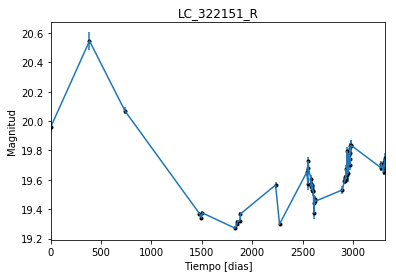

In [2]:
data = np.genfromtxt('LC_322151_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_322151_R')
plt.savefig("LC_322151_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

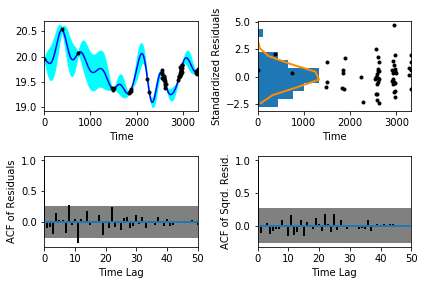

In [5]:
sample.assess_fit()

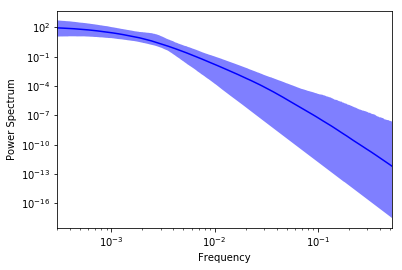

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

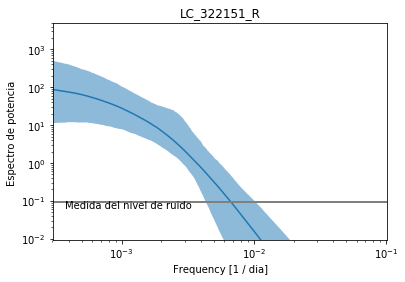

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_322151_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_322151_R')

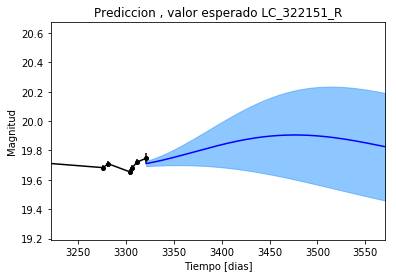

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_322151_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_322151_R')

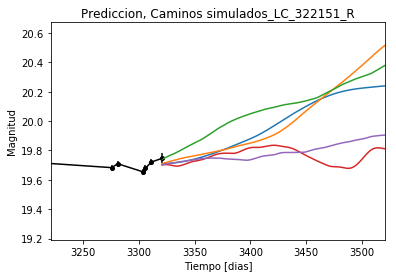

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_322151_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


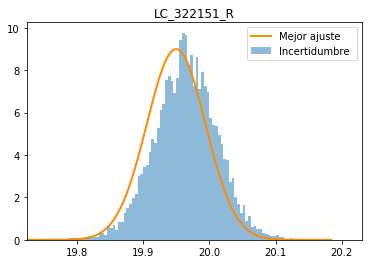

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_322151_R')
plt.savefig("Mejor_ajuste_LC_322151_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_322151_R')

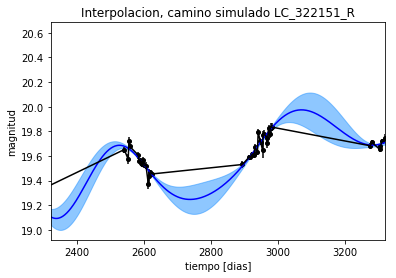

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_322151_R')

Text(0.5,1,'Interpolacion, camino simulado LC_322151_R')

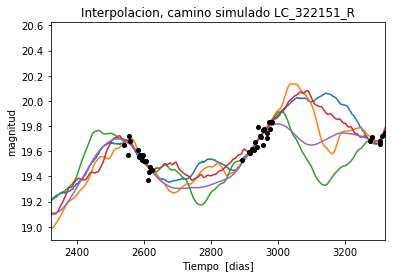

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_322151_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 385.204078815
Median: 0.00583468055636
Standard deviation: 0.19219390754
68% credibility interval: [ 0.00076842  0.17047756]
95% credibility interval: [  3.63865799e-04   7.67072075e-01]
99% credibility interval: [  3.11069866e-04   9.53168720e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 337.48160687
Median: 0.00128092595496
Standard deviation: 0.0632251147152
68% credibility interval: [ 0.00046911  0.00531076]
95% credibility interval: [ 0.00032283  0.10441325]
99% credibility interval: [  3.04603364e-04   4.30129996e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 632.444452271
Median: 0.0352276696398
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 973.744430181
Median: 90.275393654
Standard deviation: 1.70286724557
68% credibility interval: [ 88.40712244  91.50281186]
95% credibility interval: [ 85.93941118  92.59877372]
99% credibility interval: [ 83.81585613  93.2534177 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 473.827385657
Median: 0.778897312652
Standard deviation: 2.07498854696
68% credibility interval: [ 0.07003678  3.90726239]
95% credibility interval: [ 0.01802918  6.64494931]
99% credibility interval: [ 0.01133482  9.80138494]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 887.095381591
Median: 0.108969117589
Standard deviation: 6.62106123839
68% credibility interval: [ 0.00489814  2.43520356]
95% credibility interval: [  5.92610483e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2113.70661314
Median: 5.81838616691e-25
Standard deviation: 9.58930144044e+56
68% credibility interval: [  4.08848884e-55   1.54164244e-05]
95% credibility interval: [  1.42335481e-102   3.01477644e+051]
99% credibility interval: [  2.17436981e-107   4.80168227e+054]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3136.85966729
Median: 19.7459137435
Standard deviation: 0.215887781081
68% credibility interval: [ 19.57409102  19.93952903]
95% credibility interval: [ 19.33958314  20.21101869]
99% credibility interval: [ 19.11454076  20.44980058]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 454.840172681
Median: 0.00111378994634
Standard deviation: 0.176644301617
68% credibility interval: [ 0.          0.06108873]
95% credibility interval: [ 0.          0.72192735]
99% credibility interval: [ 0.         0.9709408]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 454.840172681
Median: 0.00111378994634
Standard deviation: 0.176644301617
68% credibility interval: [ 0.          0.06108873]
95% credibility interval: [ 0.          0.72192735]
99% credibility interval: [ 0.         0.9709408]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1130.47182386
Median: 0.0
Standard deviation: 0.000373733643361
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 973.744430181
Median: 90.275393654
Standard deviation: 1.70286724557
68% credibility interval: [ 88.40712244  91.50281186]
95% credibility interval: [ 85.93941118  92.59877372]
99% credibility interval: [ 83.81585613  93.2534177 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2036.72773643
Median: 0.190892179084
Standard deviation: 0.217516914733
68% credibility interval: [ 0.11395219  0.35086659]
95% credibility interval: [ 0.07207662  0.81353963]
99% credibility interval: [ 0.05461146  1.48351153]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2435.45681269
Median: 1.45336178837
Standard deviation: 0.208865556101
68% credibility interval: [ 1.2516906   1.67843264]
95% credibility interval: [ 1.09480185  1.89858695]
99% credibility interval: [ 1.00311695  1.97048256]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1303.61352287
Median: 6.57230481508e-05
Standard deviation: 0.00512834660679
68% credibility interval: [  1.83545411e-06   1.67578323e-03]
95% credibility interval: [  2.14510077e-55   1.59696405e-02]
99% credibility interval: [  1.40402939e-59   3.35700246e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 385.204078815
Median: (-0.0366603791438-0.016877139079j)
Standard deviation: 1.64016059597
68% credibility interval: [-1.07114213+0.j        -0.00482811-0.0198493j]
95% credibility interval: [ -4.81965599e+00+0.j          -2.28623624e-03-0.01812688j]
99% credibility interval: [ -5.98893570e+00+0.j          -1.95450961e-03-2.95835388j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 337.48160687
Median: (-0.00804829513982+0j)
Standard deviation: 1.17884051125
68% credibility interval: [-0.03336849+0.02312451j -0.00294751+0.j        ]
95% credibility interval: [-0.65604778+0.01293959j -0.00202840+0.01485165j]
99% credibility interval: [ -2.70258647e+00+2.21139469j  -1.91387938e-03+0.j        ]
Posterior summary for param